In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#Modules for EDA
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

#Modules for ML(Recommendation)
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [51]:
df = pd.read_csv('top100_kdrama.csv')
print(df.tail)

<bound method NDFrame.tail of                     Name  Year of release  ...  Rank Rating
0         Move to Heaven             2021  ...    #1    9.2
1      Hospital Playlist             2020  ...    #2    9.1
2         Flower of Evil             2020  ...    #3    9.1
3              My Mister             2018  ...    #4    9.1
4        Prison Playbook             2017  ...    #5    9.1
..                   ...              ...  ...   ...    ...
95  Thirty But Seventeen             2018  ...   #96    8.5
96              Vagabond             2019  ...   #97    8.5
97       Be Melodramatic             2019  ...   #98    8.5
98    Mad for Each Other             2021  ...   #99    8.5
99    The Princess's Man             2011  ...  #100    8.5

[100 rows x 14 columns]>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [6]:
synopsis = pd.read_csv('top100_kdrama.csv',usecols=['Synopsis'])
synopsis.head()

,Synopsis
0,Geu Roo is a young autistic man. He works for ...
1,The stories of people going through their days...
2,Although Baek Hee Sung is hiding a dark secret...
3,Park Dong Hoon is a middle-aged engineer who i...
4,"Kim Je Hyuk, a famous baseball player, is arre..."


In [49]:
df.head()
df.tail()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,
92856,98000701,2018,14,5,6747.0,6,1,1967,5,1,1,874,1,


# **Name as separate DataFrame**

In [8]:
kdrama_names = df[['Name']]
kdrama_names.head()

,Name
0,Move to Heaven
1,Hospital Playlist
2,Flower of Evil
3,My Mister
4,Prison Playbook


# **Features using for Recommendation**

In [9]:
cols_for_recommend = ['Year of release', 'Number of Episode', 'Network', 'Duration', 'Content Rating', 'Rating']
df = df[cols_for_recommend]
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),9.2
1,2020,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,9.1
2,2020,16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,9.1
3,2018,16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,9.1
4,2017,16,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 32 min.,15+ - Teens 15 or older,9.1


# **Feature Engineering**

# **Removing Duplicate values in Network column**

In [10]:
networks = []
[networks.append(list(set(network.replace(' ','').split(',')))[0]) for network in df['Network']]
networks[:5]

['Netflix', 'tvN', 'tvN', 'tvN', 'tvN']

In [11]:
df['Network'] = networks
df['Network'].unique()

array(['Netflix', 'tvN', 'jTBC', 'KBS2', 'OCN', 'SBS', 'MBC'],
      dtype=object)

# **Network and Total KDramas**

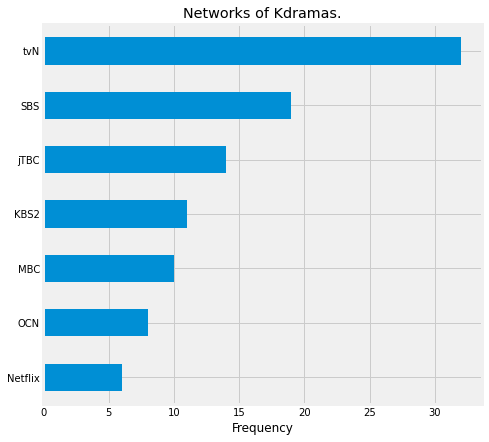

tvN        32
SBS        19
jTBC       14
KBS2       11
MBC        10
OCN         8
Netflix     6
Name: Network, dtype: int64

In [12]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.show()

df['Network'].value_counts()

# **Setting OCN and ViKi networks to others because of less count**

In [13]:
df['Network'].replace(['OCN','Viki'],['Others','Others'],inplace=True)

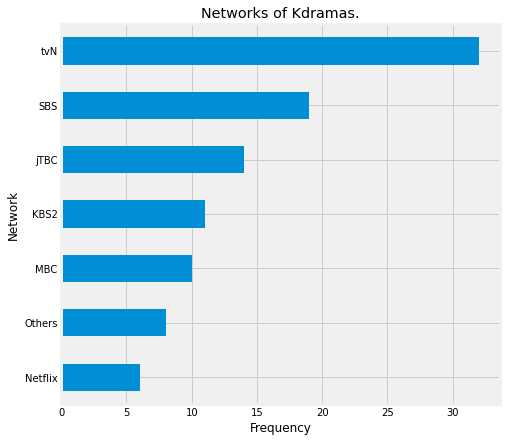

tvN        32
SBS        19
jTBC       14
KBS2       11
MBC        10
Others      8
Netflix     6
Name: Network, dtype: int64

In [14]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.ylabel('Network')
plt.show()

df['Network'].value_counts()

# **Duration in Minutes**

In [15]:
df['Duration'] = df['Duration'].str.replace('[A-Za-z]\D+','',regex=True)
df['Duration'].head()

0      52 
1    1 30 
2    1 10 
3    1 17 
4    1 32 
Name: Duration, dtype: object

In [16]:
df['Duration'] = df['Duration'].str.replace(' ','',regex=True)
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'].head()

0     52
1    130
2    110
3    117
4    132
Name: Duration, dtype: int64

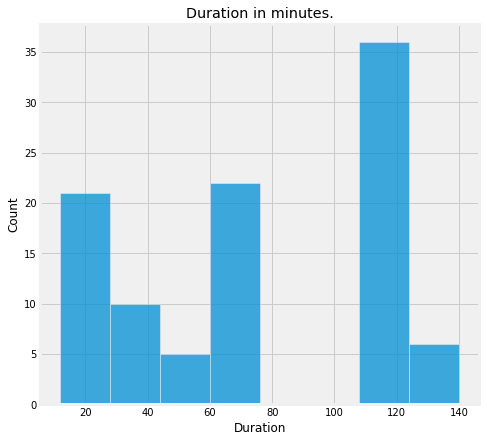

In [17]:
plt.figure(figsize=(7,7))
sns.histplot(data=df['Duration'])
plt.title('Duration in minutes.')
plt.show()

# **Content Rating**

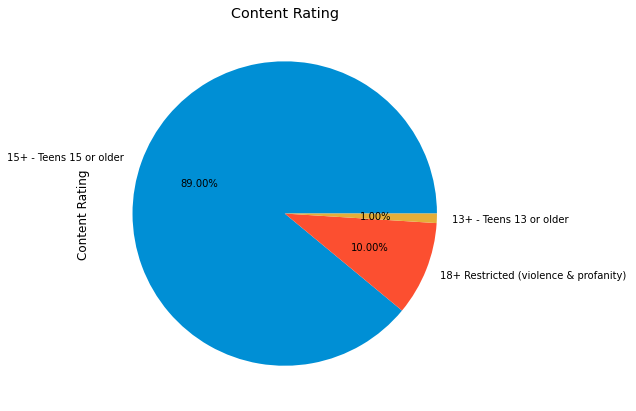

In [18]:
plt.figure(figsize=(7,7))
df['Content Rating'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Content Rating")
plt.show()

In [19]:
df['Content Rating'].value_counts()

15+ - Teens 15 or older                   89
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    1
Name: Content Rating, dtype: int64

# **Rating and Content Rating**

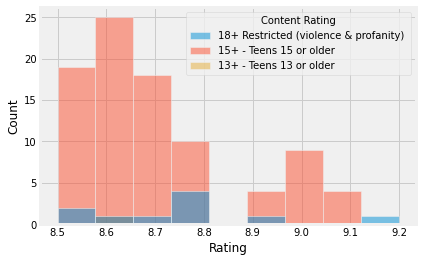

In [20]:
#평점
sns.histplot(data=df[['Rating','Content Rating']],x='Rating',hue='Content Rating')
plt.show()

In [21]:
df[['Rating']].describe()

,Rating
count,100.000000
mean,8.703000
std,0.178351
min,8.500000
25%,8.600000
50%,8.700000
75%,8.800000
max,9.200000


# **One Hot Encoding**

In [22]:
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52,18+ Restricted (violence & profanity),9.2
1,2020,12,tvN,130,15+ - Teens 15 or older,9.1
2,2020,16,tvN,110,15+ - Teens 15 or older,9.1
3,2018,16,tvN,117,15+ - Teens 15 or older,9.1
4,2017,16,tvN,132,15+ - Teens 15 or older,9.1


In [23]:
cols_to_encode = ['Network','Content Rating']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True) #drop_first? - 첫번째 컬럼 삭제, 두세번째 범주형 자료 값이 0이면 당연하게 1이니까
dummies.head()

,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,1,0


In [24]:
df.drop(cols_to_encode, axis=1,inplace=True)
df.head()

,Year of release,Number of Episode,Duration,Rating
0,2021,10,52,9.2
1,2020,12,130,9.1
2,2020,16,110,9.1
3,2018,16,117,9.1
4,2017,16,132,9.1


# **Feature Scaling**

In [25]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)

In [26]:
i=0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [27]:
df.head()

,Year of release,Number of Episode,Duration,Rating
0,1.000000,0.042553,0.312500,1.000000
1,0.944444,0.063830,0.921875,0.857143
2,0.944444,0.106383,0.765625,0.857143
3,0.833333,0.106383,0.820312,0.857143
4,0.777778,0.106383,0.937500,0.857143


In [28]:
new_df = pd.concat([df, dummies],axis=1)
new_df.shape

(100, 12)

In [29]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
1,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
2,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
3,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0
4,0.777778,0.106383,0.937500,0.857143,0,0,0,0,0,1,1,0


In [30]:
kdrama_names['Name'].loc[23]='kingdom'

In [31]:
new_df.index = [drama for drama in kdrama_names['Name']]
synopsis.index = [drama for drama in kdrama_names['Name']]

In [32]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
Move to Heaven,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
Hospital Playlist,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
Flower of Evil,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
My Mister,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0
Prison Playbook,0.777778,0.106383,0.937500,0.857143,0,0,0,0,0,1,1,0


In [33]:
def getRecommendation_dramas_for(drama_name,no_of_recommend=5,get_similarity_rate=False):
    
    kn = NearestNeighbors(n_neighbors=no_of_recommend+1,metric='manhattan')
    kn.fit(new_df)
    
    distances, indices = kn.kneighbors(new_df.loc[drama_name])
    
    print(f'Similar K-Dramas for "{drama_name[0]}":')
    nearest_dramas = [kdrama_names.loc[i][0] for i in indices.flatten()][1:]
    if not get_similarity_rate:
        return nearest_dramas
    sim_rates = []
    synopsis_ = []
    for drama in nearest_dramas:
        synopsis_.append(synopsis.loc[drama][0])
        sim = cosine_similarity(new_df.loc[drama_name],[new_df.loc[drama]]).flatten()
        sim_rates.append(sim[0])
    recommended_dramas = pd.DataFrame({'Recommended Drama':nearest_dramas,'Similarity':sim_rates,'Synopsis':synopsis_})
    recommended_dramas.sort_values(by='Similarity',ascending=True)
    return recommended_dramas

# **Predicting Drama Recommendation**

In [34]:
rd1 = kdrama_names.loc[0]
rd1

Name    Move to Heaven
Name: 0, dtype: object

In [35]:
getRecommendation_dramas_for(rd1,no_of_recommend=5)

Similar K-Dramas for "Move to Heaven":


['Kingdom', 'Sweet Home', 'kingdom', 'Extracurricular', 'Taxi Driver']

In [36]:
rd2 = kdrama_names.loc[10]
rd2

Name    Mother
Name: 10, dtype: object

In [37]:
getRecommendation_dramas_for(rd2,get_similarity_rate=True)

Similar K-Dramas for "Mother":


,Recommended Drama,Similarity,Synopsis
0,Navillera,0.996550,A 70-year-old with a dream and a 23-year-old w...
1,Stranger 2,0.945869,The prosecutor's office and the police find th...
2,What's Wrong with Secretary Kim,0.916882,The series revolves around the narcissistic Le...
3,Signal,0.908419,"Fifteen years ago, a young girl was kidnapped ..."
4,It's Okay to Not Be Okay,0.917246,Moon Gang Tae is a community health worker at ...


In [38]:
rd3 = kdrama_names.loc[1]
rd3

Name    Hospital Playlist
Name: 1, dtype: object

In [39]:
getRecommendation_dramas_for(rd3,get_similarity_rate=True)

Similar K-Dramas for "Hospital Playlist":


,Recommended Drama,Similarity,Synopsis
0,Flower of Evil,0.997420,Although Baek Hee Sung is hiding a dark secret...
1,Prison Playbook,0.996988,"Kim Je Hyuk, a famous baseball player, is arre..."
2,My Mister,0.998064,Park Dong Hoon is a middle-aged engineer who i...
3,Crash Landing on You,0.997901,"After getting into a paragliding accident, Sou..."
4,It's Okay to Not Be Okay,0.996995,Moon Gang Tae is a community health worker at ...


In [40]:
def print_similiar_drama_Synopsis(recommended_df):
    rdf = recommended_df
    rdf_cols = rdf['Synopsis']
    dramas = rdf['Recommended Drama']
    for i in range(5):
        print(dramas[i])
        print(rdf_cols[i])
        print('\n')

In [41]:
rd4 = kdrama_names.loc[8]
rd4

Name    Navillera
Name: 8, dtype: object

In [42]:
rdf4 = getRecommendation_dramas_for(rd4,no_of_recommend=10,get_similarity_rate=True)
print_similiar_drama_Synopsis(rdf4)

Similar K-Dramas for "Navillera":
Mother
Realizing one of her students is being abused, school teacher and bird researcher Soo Jin impulsively kidnaps the girl and acts as a substitute mother in an attempt to take care of her.


Stranger 2
The prosecutor's office and the police find themselves on opposing sides. The prosecutors, including elite prosecutor Woo Tae Ha, want discretionary power over investigations. Meanwhile, the police, including Choi Bit, tries to get complete investigative authority that is independent of the prosecutor's office.


It's Okay to Not Be Okay
Moon Gang Tae is a community health worker at a psychiatric ward who was blessed with everything including a great body, smarts, ability to sympathize with others, patience, ability to react quickly, stamina, and more. Meanwhile, Ko Moon Young is a popular writer of children’s literature who, due to suffering from an antisocial personality disorder, seems extremely selfish, arrogant, and rude.


Vincenzo
At the age o

In [43]:
rd5 = kdrama_names.loc[99]
rd5

Name    The Princess's Man
Name: 99, dtype: object

In [44]:
getRecommendation_dramas_for(rd5,no_of_recommend=5,get_similarity_rate=True)

Similar K-Dramas for "The Princess's Man":


,Recommended Drama,Similarity,Synopsis
0,The Bridal Mask,0.990743,Lee Kang To is an ambitious and callous Korean...
1,Fight For My Way,0.933451,Can you still go after your dreams without the...
2,When the Camellia Blooms,0.945622,Dong Baek is a single mother living in the sma...
3,My Father is Strange,0.948805,This drama is about a family that lives on the...
4,Good Manager,0.930736,Can corporate politics turn a bad person into ...


### **Similarly I have done Android App Recommendation and Amazon Book Recommendation**
### **If you're interested then click on below links:**
1. **<a href="https://www.kaggle.com/nandalald/android-app-recommendation/">Android App Recommendation</a>**
2. **<a href="https://www.kaggle.com/nandalald/amazon-books-eda-recommendation">Amazon Book Recommendation</a>**

In [46]:
import pandas as pd

df= pd.read_csv('Korea Income and Welfare.csv')

In [47]:
df.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [48]:
df.tail()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,
92856,98000701,2018,14,5,6747.0,6,1,1967,5,1,1,874,1,
